In [8]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [9]:
def prot_div(left, right):
    if right == 0:
        return 0
    else:
        return left / right

def if_func(condition, state1, state2):
    if condition:
        return state1
    else:
        return state2

def read_experiment_results(experiment_name, iterations, epochs=100):
    dir_name = '/Users/soren/Work/Research/dsge_learning_rate/results/' + experiment_name
    results = []
    for it in range(iterations):
        with open(dir_name + 'iteration_' + str(it) + '.json') as json_file:
            if it % 10 == 0:
                print(it)
            data = json.load(json_file)
            for i in data:
                #print(i['phenotype'])
                past_lr = 0.01
                i['values'] = []
                for epoch in range(epochs):
                    learning_rate = past_lr
                    lr = eval(i['phenotype'])
                    past_lr = lr
                    i['values'].append(lr)
            results.append(data)
    print("Finished reading ", experiment_name)
    return results


In [10]:
results = []
month = '1'
day = '17'
trial_number = '2'
#folder_name = 'dumps_' + month + '_' + day
folder_name = 'dumps/adaptiveTest'
#folder_name = 'trial' + trial_number
#run_number = ['2','3','4','5','6','7','8','9','11','12']
run_number = ['1','2','3','4','5','6','7','8','9','10']
iterations = 1500
for i in run_number: 
    results.append(read_experiment_results(folder_name + '/run_' + i + '/', iterations))


0
10
20
30
40
Finished reading  trial2/run_1/
0
10
20
30
40
Finished reading  trial2/run_2/
0
10
20
30
40
Finished reading  trial2/run_3/
0
10
20
30
40
Finished reading  trial2/run_4/
0
10
20
30
40
Finished reading  trial2/run_5/
0
10
20
30
40
Finished reading  trial2/run_6/
0
10
20
30
40
Finished reading  trial2/run_7/
0
10
20
30
40
Finished reading  trial2/run_8/
0
10
20
30
40
Finished reading  trial2/run_9/
0
10
20
30
40
Finished reading  trial2/run_10/


In [11]:
def plot_iter(iter_results, stop_epoch, indivs=None, color='blue', id_num=0):
    epochs = np.arange(len(iter_results[0]['values']))
    if indivs == None:
        for i in iter_results:
            plt.xlabel('Epoch')
            plt.ylabel('Learning Rate')
            plt.axvline(stop_epoch)
            plt.plot(epochs, i['values'], label='val_acc: ' + str(-i['fitness']), color=color)
            plt.savefig(str(id_num) + '.pdf')
            plt.show()
            foo = 0
            for x in i['other_info']['val_accuracy']:
                print(x, foo)
                foo += 1
    plt.show()
        
        

def plot_fit(results):
    epochs = np.arange(len(results[0]))
    #print(epochs)
    averages_all = []
    bests_all = []
    stds_all = []
    best_of_all = []
    stds_best_all = [] 
    boa_fit = 0
    boa_indiv = None
    for iteration in epochs:
        averages_all.append([])
        bests_all.append([])
        stds_all.append([])
        best_of_all.append(0)
        stds_best_all.append(0)        
        for result in results:
            all_fits = []
            best = 0
            gen_best = 0
            for indiv in result[iteration]:
                if indiv['fitness'] < best:
                    best = indiv['fitness']
                    #plot_iter([indiv])
                    #print(indiv['other_info'].keys())
                    if indiv['fitness'] < boa_fit:
                        boa_fit = best
                        boa_indiv = indiv
                        print('NEW BEST\n', indiv['phenotype'], iteration)
                        plot_iter([boa_indiv], len(indiv['other_info']['loss']), color='red', id_num=iteration)
                best = best if indiv['fitness'] > best else indiv['fitness']
                all_fits.append(indiv['fitness'])
            averages_all[iteration].append(np.average(all_fits))
            stds_all[iteration].append(np.std(all_fits))
            bests_all[iteration].append(best)
        stds_best_all[iteration] = np.std(bests_all[iteration]) * -1
        stds_all[iteration] = np.std(averages_all[iteration])
        averages_all[iteration] = np.average(averages_all[iteration]) * -1
        best_of_all[iteration] = np.min(bests_all[iteration])  * -1
        bests_all[iteration] = np.average(bests_all[iteration]) * -1
    #plt.plot(epochs, averages_all, label='population average')
    #plt.fill_between(epochs, [i + j for i, j in zip(averages_all, stds_all)], [i - j for i, j in zip(averages_all, stds_all)], alpha=0.2)
    plt.plot(epochs, bests_all, label='best average')   
    plt.fill_between(epochs, [i + j for i, j in zip(bests_all, stds_best_all)], [i - j for i, j in zip(bests_all, stds_best_all)], alpha=0.2)
    #plt.plot(epochs, [0.7862666646639506 for i in bests_all], label='fixed lr val_acc')
    #plt.plot(epochs, best_of_all, label='best of all')
    plt.xlabel('Generation')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig('best_average_evolution.pdf')
    plt.show()



NEW BEST
 0.03541818181818182 0


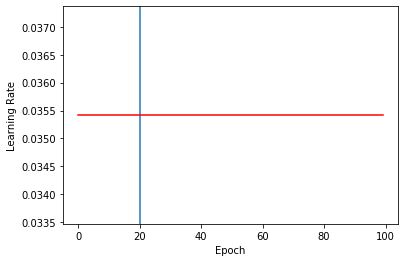

0.4350000023841858 0
0.6156666874885559 1
0.6330000162124634 2
0.6566666960716248 3
0.7226666808128357 4
0.7829999923706055 5
0.79666668176651 6
0.8206666707992554 7
0.8113333582878113 8
0.8450000286102295 9
0.8266666531562805 10
0.8526666760444641 11
0.8529999852180481 12
0.8456666469573975 13
0.8533333539962769 14
0.8790000081062317 15
0.8676666617393494 16
0.8513333201408386 17
0.859333336353302 18
0.875333309173584 19
NEW BEST
 if_func(epoch >= 94, 0.08486363636363638, if_func(learning_rate > 0.03844545454545455, if_func(epoch > 31, if_func(learning_rate >= 0.016245454545454546, 0.1, if_func(epoch < 74, 0.05358181818181819, if_func(epoch <= 46, 0.0878909090909091, 0.01019090909090909))), 0.05963636363636364), 0.0223)) 0


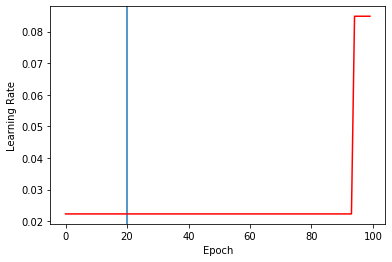

0.5873333215713501 0
0.6516666412353516 1
0.6903333067893982 2
0.7013333439826965 3
0.7056666612625122 4
0.746999979019165 5
0.8009999990463257 6
0.8086666464805603 7
0.8149999976158142 8
0.8173333406448364 9
0.8006666898727417 10
0.8226666450500488 11
0.8413333296775818 12
0.8399999737739563 13
0.8519999980926514 14
0.8519999980926514 15
0.8486666679382324 16
0.8579999804496765 17
0.859000027179718 18
0.859333336353302 19
NEW BEST
 0.026336363636363637 1


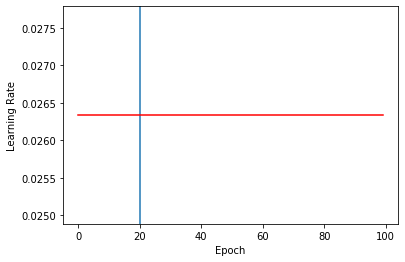

0.47066667675971985 0
0.5809999704360962 1
0.7096666693687439 2
0.7456666827201843 3
0.7786666750907898 4
0.8023333549499512 5
0.82833331823349 6
0.8100000023841858 7
0.8190000057220459 8
0.8220000267028809 9
0.8220000267028809 10
0.8399999737739563 11
0.8373333215713501 12
0.8426666855812073 13
0.8426666855812073 14
0.8543333411216736 15
0.8416666388511658 16
0.8463333249092102 17
0.828000009059906 18
0.8576666712760925 19
NEW BEST
 0.0223 1


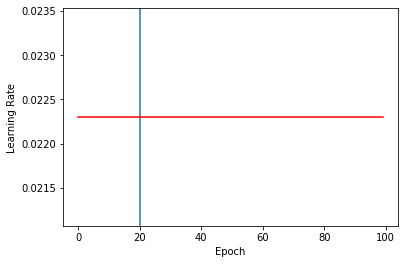

0.5640000104904175 0
0.6446666717529297 1
0.6743333339691162 2
0.6639999747276306 3
0.7086666822433472 4
0.7526666522026062 5
0.7749999761581421 6
0.8003333210945129 7
0.8166666626930237 8
0.812666654586792 9
0.8273333311080933 10
0.8320000171661377 11
0.8353333473205566 12
0.8483333587646484 13
0.8386666774749756 14
0.8389999866485596 15
0.8506666421890259 16
0.8503333330154419 17
0.859333336353302 18
0.8576666712760925 19
NEW BEST
 0.026336363636363637 2


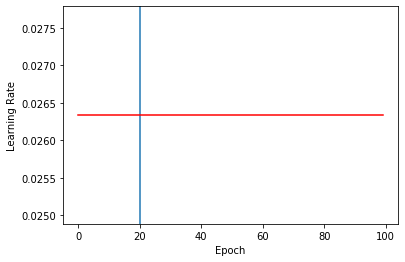

0.625333309173584 0
0.7409999966621399 1
0.7946666479110718 2
0.7960000038146973 3
0.7839999794960022 4
0.8183333277702332 5
0.8226666450500488 6
0.8326666951179504 7
0.8433333039283752 8
0.8460000157356262 9
0.8429999947547913 10
0.8519999980926514 11
0.8533333539962769 12
0.8603333234786987 13
0.8693333268165588 14
0.8533333539962769 15
0.8713333606719971 16
0.8733333349227905 17
0.8730000257492065 18
0.875 19
NEW BEST
 0.0223 9


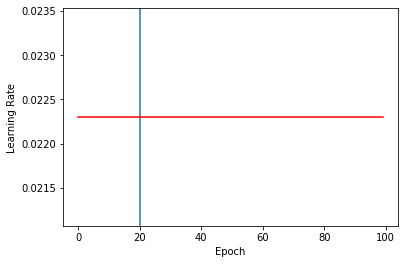

0.5239999890327454 0
0.6303333044052124 1
0.6513333320617676 2
0.7006666660308838 3
0.6853333115577698 4
0.7086666822433472 5
0.7350000143051147 6
0.7293333411216736 7
0.7796666622161865 8
0.7923333048820496 9
0.8326666951179504 10
0.8183333277702332 11
0.8243333101272583 12
0.8416666388511658 13
0.8450000286102295 14
0.8503333330154419 15
0.846666693687439 16
0.8489999771118164 17
0.8456666469573975 18
0.8650000095367432 19
NEW BEST
 if_func(epoch <= 25, 0.02532727272727273, 0.0031272727272727272) 22


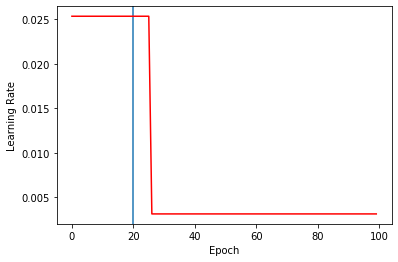

0.6060000061988831 0
0.7486666440963745 1
0.7576666474342346 2
0.7839999794960022 3
0.8273333311080933 4
0.8143333196640015 5
0.8113333582878113 6
0.8353333473205566 7
0.8316666483879089 8
0.847000002861023 9
0.8579999804496765 10
0.8543333411216736 11
0.8529999852180481 12
0.8656666874885559 13
0.8543333411216736 14
0.8686666488647461 15
0.8683333396911621 16
0.8486666679382324 17
0.8606666922569275 18
0.875 19
NEW BEST
 if_func(epoch < 67, 0.03541818181818182, if_func(epoch >= 59, if_func(learning_rate <= 0.05156363636363637, if_func(epoch < 39, if_func(epoch < 96, if_func(epoch <= 83, if_func(epoch > 89, if_func(epoch >= 85, 0.002118181818181818, if_func(epoch < 11, 0.05257272727272728, if_func(epoch <= 92, 0.0889, if_func(epoch < 91, 0.08082727272727273, 0.08587272727272728)))), 0.02431818181818182), 0.06871818181818183), 0.04853636363636364), 0.005145454545454546), if_func(learning_rate <= 0.09495454545454546, if_func(epoch < 44, if_func(learning_rate >= 0.06266363636363637, 0.091

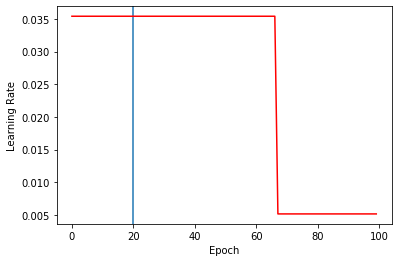

0.3373333215713501 0
0.4950000047683716 1
0.4963333308696747 2
0.6980000138282776 3
0.7683333158493042 4
0.7680000066757202 5
0.8116666674613953 6
0.7960000038146973 7
0.8136666417121887 8
0.8209999799728394 9
0.8296666741371155 10
0.8226666450500488 11
0.8190000057220459 12
0.8130000233650208 13
0.8159999847412109 14
0.8420000076293945 15
0.8426666855812073 16
0.8463333249092102 17
0.8389999866485596 18
0.8489999771118164 19
NEW BEST
 0.02532727272727273 40


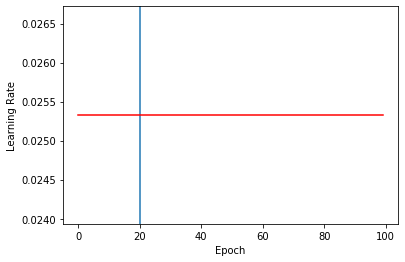

0.67166668176651 0
0.6990000009536743 1
0.7620000243186951 2
0.7816666960716248 3
0.7816666960716248 4
0.8076666593551636 5
0.7950000166893005 6
0.8133333325386047 7
0.8190000057220459 8
0.8069999814033508 9
0.8266666531562805 10
0.8233333230018616 11
0.843999981880188 12
0.8393333554267883 13
0.8446666598320007 14
0.847000002861023 15
0.8533333539962769 16
0.8546666502952576 17
0.8453333377838135 18
0.8653333187103271 19
NEW BEST
 if_func(epoch < 67, 0.03541818181818182, if_func(epoch > 59, if_func(learning_rate <= 0.05156363636363637, if_func(learning_rate >= 0.002118181818181818, if_func(epoch < 39, if_func(epoch <= 21, if_func(epoch > 82, if_func(epoch >= 89, 0.05257272727272728, if_func(epoch < 85, 0.0889, if_func(epoch <= 11, 0.08082727272727273, if_func(learning_rate < 0.08587272727272728, 0.02431818181818182, 0.06871818181818183)))), if_func(learning_rate < 0.04853636363636364, 0.005145454545454546, 0.09495454545454546)), 0.07880909090909091), if_func(epoch < 92, 0.091927272727

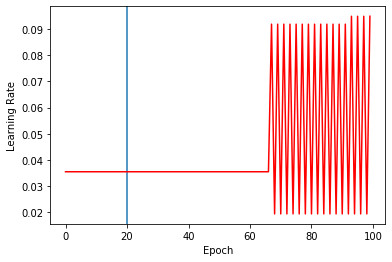

0.3876666724681854 0
0.5379999876022339 1
0.6306666731834412 2
0.7293333411216736 3
0.7563333511352539 4
0.7666666507720947 5
0.7789999842643738 6
0.7923333048820496 7
0.8063333630561829 8
0.8289999961853027 9
0.8336666822433472 10
0.8263333439826965 11
0.8399999737739563 12
0.8326666951179504 13
0.8323333263397217 14
0.8510000109672546 15
0.8479999899864197 16
0.8443333506584167 17
0.8606666922569275 18
0.8619999885559082 19


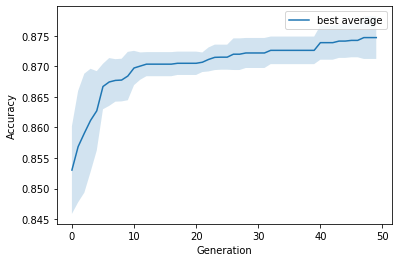

In [12]:
plot_fit(results)

In [6]:
import json
dire = '/Users/soren/Work/Research/dsge_learning_rate/results/'
with open(dire + 'simple_results.json') as json_file:
    data = json.load(json_file)
    foo = []
    duration = []
    val_accs = []
    for result_run in data:
        foo.append(result_run[-1][-1])
        duration.append(len(result_run[0]['history']['val_acc']))
        val_accs.append(np.max(result_run[0]['history']['val_acc']))
    print(np.average(foo))
    print(np.std(foo))
    print(np.average(duration))
    print(np.average(val_accs))

0.8607600021362304
0.007338288333378498
38.8
0.8650666634241739
